## Handling imbalanced dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
np.random.seed(123)
n_samples=1000
class_0_ratio= 0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [4]:
n_class_0,n_class_1

(900, 100)

In [7]:
class_0=pd.DataFrame(
    {"feature1":np.random.normal(loc=0,scale=1,size=n_class_0),
     "feature2":np.random.normal(loc=0,scale=1,size=n_class_0),
     "target":[0]*n_class_0
    })

In [8]:
class_1=pd.DataFrame(
    {"feature1":np.random.normal(loc=0,scale=1,size=n_class_1),
     "feature2":np.random.normal(loc=0,scale=1,size=n_class_1),
     "target":[1]*n_class_1
    })

In [9]:
class_1

,feature1,feature2,target
0,-0.300232,0.139033,1
1,-0.632261,0.025577,1
2,-0.204317,-0.196443,1
3,0.213696,1.312255,1
4,1.033878,1.187417,1
...,...,...,...
95,-0.623629,0.845701,1
96,0.239810,-1.119923,1
97,-0.868240,-0.359297,1
98,0.902006,-1.609695,1


In [10]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [11]:
df

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


In [12]:
df.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [14]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [17]:
df['feature2'].value_counts().sum()

1000

In [19]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [20]:
df_minority.head()

,feature1,feature2,target
900,-0.300232,0.139033,1
901,-0.632261,0.025577,1
902,-0.204317,-0.196443,1
903,0.213696,1.312255,1
904,1.033878,1.187417,1


In [24]:
from sklearn.utils import resample

In [33]:
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [35]:
df_minority_upsample.value_counts().sum()

900

In [36]:
df_minority_upsample

,feature1,feature2,target
951,-0.874146,-0.156083,1
992,0.196570,-0.602575,1
914,-0.067830,0.998053,1
971,0.272825,1.034197,1
960,0.870056,-0.449515,1
...,...,...,...
952,-0.811098,0.189189,1
965,1.919526,-0.019459,1
976,0.810326,1.604614,1
942,1.621531,0.168229,1


In [38]:
df_minority_upsample.shape

(900, 3)

In [39]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [41]:
df_minority.shape

(100, 3)

In [42]:
df_majority.shape

(900, 3)

In [46]:
df_upsampled=pd.concat([df_minority_upsample,df_majority])

In [47]:
df_upsampled

,feature1,feature2,target
951,-0.874146,-0.156083,1
992,0.196570,-0.602575,1
914,-0.067830,0.998053,1
971,0.272825,1.034197,1
960,0.870056,-0.449515,1
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [50]:
df_upsampled['target'].value_counts()

target
1    900
0    900
Name: count, dtype: int64

## Downsampling

In [51]:
class_0=pd.DataFrame(
    {"feature1":np.random.normal(loc=0,scale=1,size=n_class_0),
     "feature2":np.random.normal(loc=0,scale=1,size=n_class_0),
     "target":[0]*n_class_0
    })
class_1=pd.DataFrame(
    {"feature1":np.random.normal(loc=0,scale=1,size=n_class_1),
     "feature2":np.random.normal(loc=0,scale=1,size=n_class_1),
     "target":[1]*n_class_1
    })

In [52]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [53]:
df

,feature1,feature2,target
0,-0.448502,1.011410,0
1,-0.093589,1.328019,0
2,1.884547,-0.293611,0
3,1.135791,0.600355,0
4,0.086185,1.306732,0
...,...,...,...
995,-0.590001,2.068926,1
996,0.931866,0.771442,1
997,1.400507,0.463464,1
998,-1.452936,-0.025631,1


In [54]:
class_0.shape

(900, 3)

In [55]:
class_1.shape

(100, 3)

In [56]:
df

,feature1,feature2,target
0,-0.448502,1.011410,0
1,-0.093589,1.328019,0
2,1.884547,-0.293611,0
3,1.135791,0.600355,0
4,0.086185,1.306732,0
...,...,...,...
995,-0.590001,2.068926,1
996,0.931866,0.771442,1
997,1.400507,0.463464,1
998,-1.452936,-0.025631,1


In [62]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [68]:
df_majority=df[df['target']==0]

In [69]:
df_majority

,feature1,feature2,target
0,-0.448502,1.011410,0
1,-0.093589,1.328019,0
2,1.884547,-0.293611,0
3,1.135791,0.600355,0
4,0.086185,1.306732,0
...,...,...,...
895,1.020117,-0.141769,0
896,0.063000,0.666577,0
897,0.701429,-0.578638,0
898,-0.727354,0.822430,0


In [71]:
df_minority=df[df['target']==1]

In [73]:
df_minority

,feature1,feature2,target
900,-1.574052,0.497554,1
901,0.618025,0.604871,1
902,-1.647693,1.189228,1
903,-0.114592,1.449005,1
904,0.259571,-0.412945,1
...,...,...,...
995,-0.590001,2.068926,1
996,0.931866,0.771442,1
997,1.400507,0.463464,1
998,-1.452936,-0.025631,1


In [75]:
# df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
df_majority_down=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [78]:
df_majority_down['target'].shape


(100,)

In [79]:
df_majority_down['target'].value_counts()

target
0    100
Name: count, dtype: int64

In [82]:
df_minority['target'].value_counts()

target
1    100
Name: count, dtype: int64

In [83]:
df_downsample=pd.concat([df_majority_down,df_minority])

In [84]:
df_downsample

,feature1,feature2,target
70,-0.099433,0.234339,0
827,0.858946,-1.399617,0
231,1.539891,-0.831040,0
588,-0.721146,-1.472236,0
39,-0.399320,-1.156795,0
...,...,...,...
995,-0.590001,2.068926,1
996,0.931866,0.771442,1
997,1.400507,0.463464,1
998,-1.452936,-0.025631,1


## Smote (Synthetic Minority Oversampling technique)

In [10]:
from sklearn.datasets import make_classification

In [11]:
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [12]:
X #independent feature

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [13]:
y #dependent feature

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

In [17]:
final_df=pd.concat([df1,df2],axis=1)

In [18]:
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [21]:
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

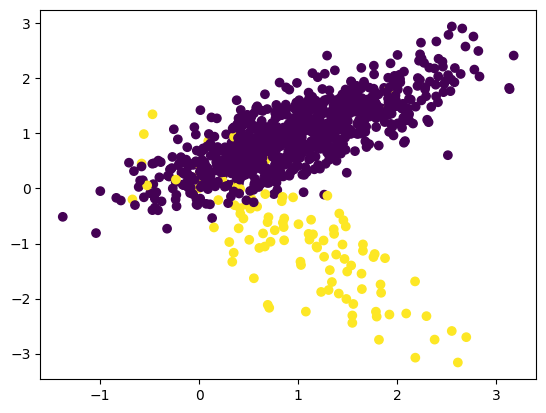

In [24]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [25]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   --------------------------------------  235.5/235.6 kB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 2.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from imblearn.over_sampling import SMOTE

In [29]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [30]:
X.shape

(1788, 2)

In [31]:
y.shape

(1788,)

In [33]:
len(y[y==0])

894

In [34]:
len(y[y==1])

894

In [36]:
len(X[X==0])

1788

In [43]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample=pd.concat([df1,df2],axis=1)

In [44]:
oversample['target'].value_counts()


target
1    894
0    894
Name: count, dtype: int64

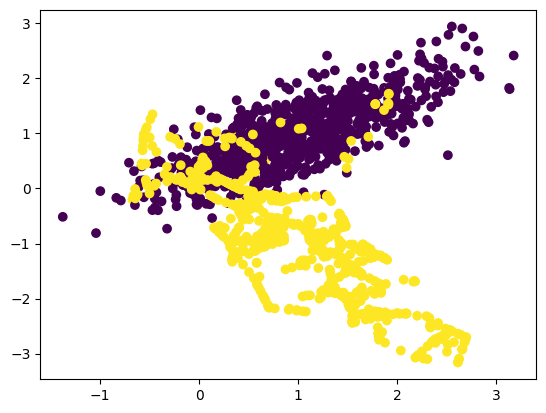

In [45]:
import matplotlib.pyplot as plt
plt.scatter(oversample['f1'],oversample['f2'],c=oversample['target'])